# Crowd Reaction Estimation Dataset (CRED) Analysis


## Introduction
In the realm of social media, understanding and predicting post reach is a significant challenge. This notebook presents various analyses using the Crowd Reaction Estimation Dataset (CRED), which consists of pairs of tweets from The White House with comparative measures of retweet count. The analyses aim to provide insights into tweet engagement and factors affecting retweet counts.


## Importing Libraries and Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime

file_path = 'data/CRED_without_tweets.xlsx'
df = pd.read_excel(file_path)


## Data Cleaning and Preprocessing

In [2]:
df['Datetime_x'] = pd.to_datetime(df['Datetime_x'])
df['Datetime_y'] = pd.to_datetime(df['Datetime_y'])

df['hour_x'] = df['Datetime_x'].dt.hour
df['day_x'] = df['Datetime_x'].dt.day
df['month_x'] = df['Datetime_x'].dt.month
df['year_x'] = df['Datetime_x'].dt.year

df['hour_y'] = df['Datetime_y'].dt.hour
df['day_y'] = df['Datetime_y'].dt.day
df['month_y'] = df['Datetime_y'].dt.month
df['year_y'] = df['Datetime_y'].dt.year


## Exploratory Data Analysis

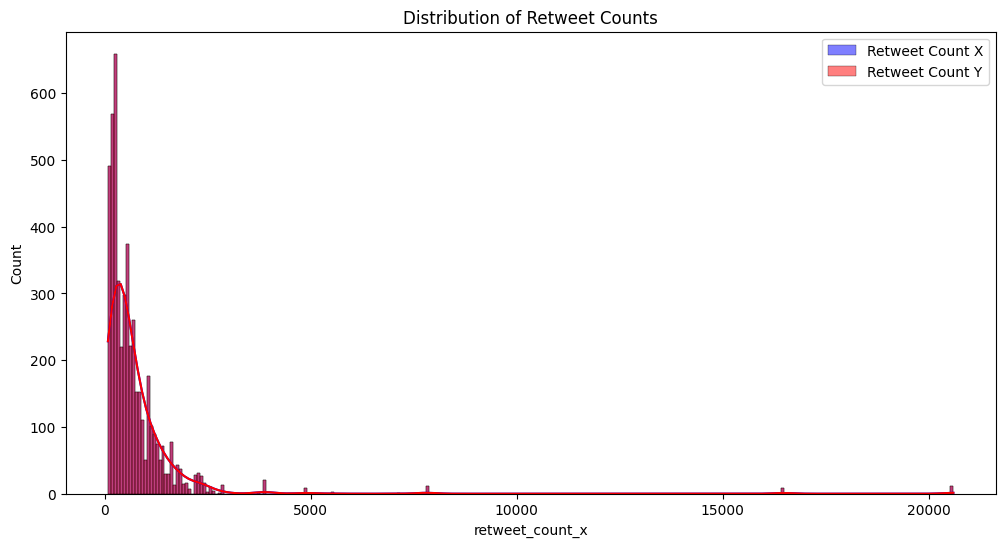

In [3]:

plt.figure(figsize=(12, 6))
sns.histplot(df['retweet_count_x'], kde=True, color='blue', label='Retweet Count X')
sns.histplot(df['retweet_count_y'], kde=True, color='red', label='Retweet Count Y')
plt.legend()
plt.title('Distribution of Retweet Counts')
plt.show()


## Time-based Analysis

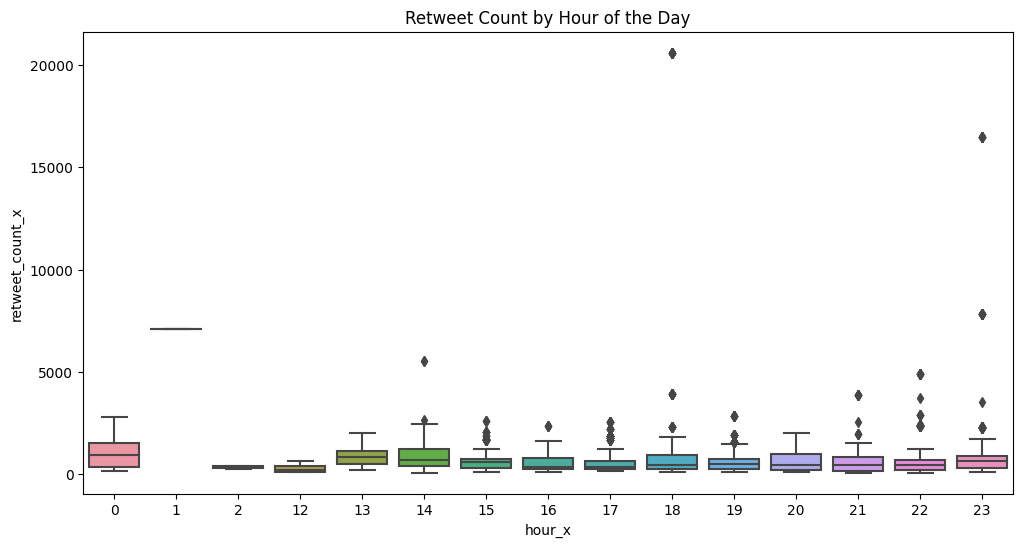

In [4]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour_x', y='retweet_count_x', data=df)
plt.title('Retweet Count by Hour of the Day')
plt.show()


## Category-wise Analysis

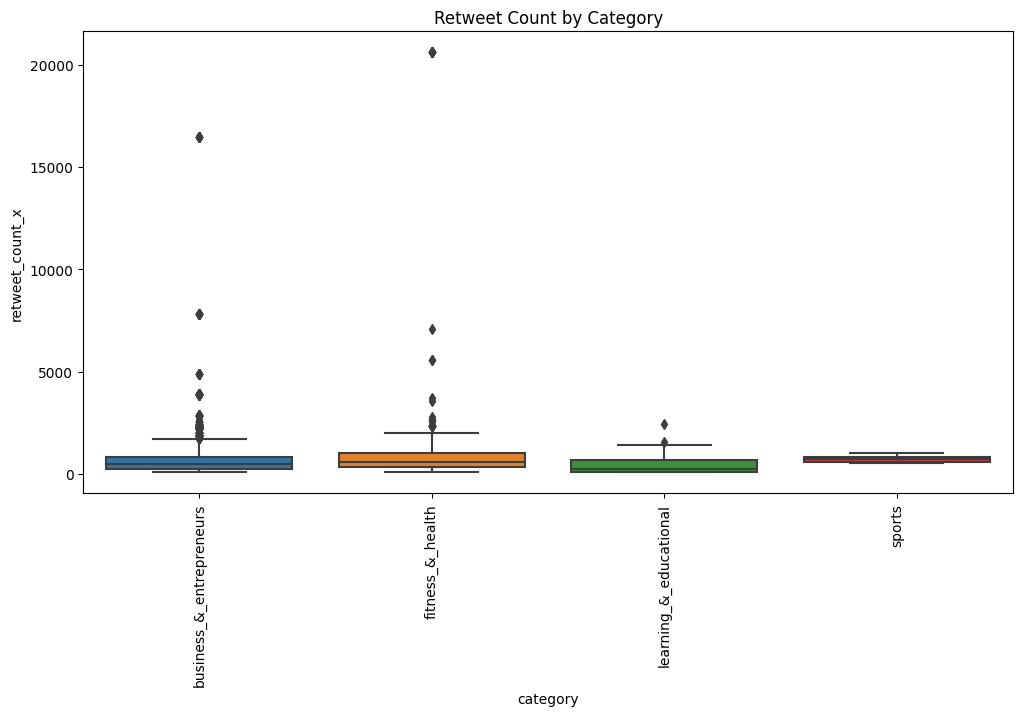

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='retweet_count_x', data=df)
plt.xticks(rotation=90)
plt.title('Retweet Count by Category')
plt.show()


## Sentiment Analysis of Model Responses

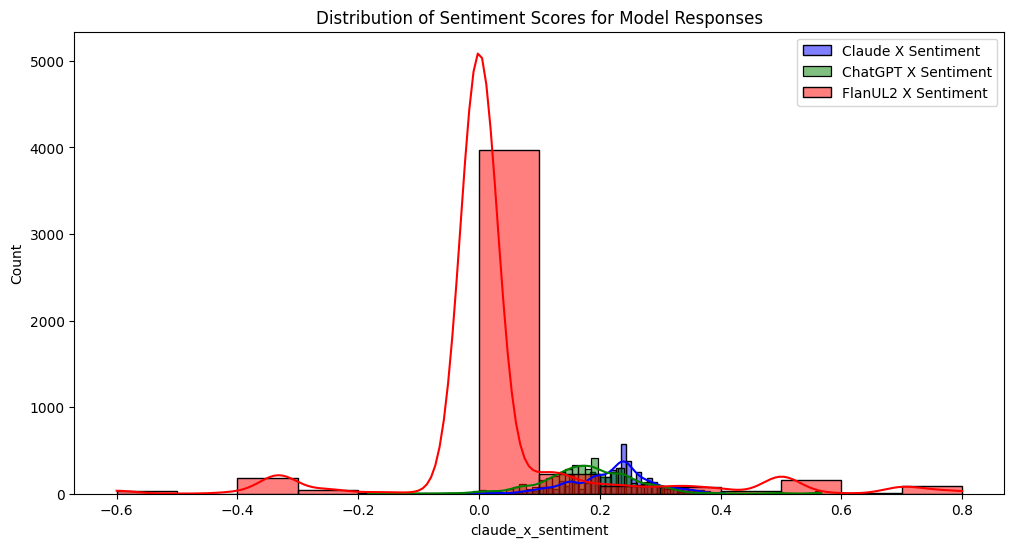

In [6]:

from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['claude_x_sentiment'] = df['claude_x_cleaned'].apply(get_sentiment)
df['chatgpt_x_sentiment'] = df['chatgpt_x_cleaned'].apply(get_sentiment)
df['flanul2_x_sentiment'] = df['flanul2_x'].apply(get_sentiment)

plt.figure(figsize=(12, 6))
sns.histplot(df['claude_x_sentiment'], kde=True, color='blue', label='Claude X Sentiment')
sns.histplot(df['chatgpt_x_sentiment'], kde=True, color='green', label='ChatGPT X Sentiment')
sns.histplot(df['flanul2_x_sentiment'], kde=True, color='red', label='FlanUL2 X Sentiment')
plt.legend()
plt.title('Distribution of Sentiment Scores for Model Responses')
plt.show()


## Prediction Modeling

Accuracy: 0.75
Precision: 0.79
Recall: 0.71
F1 Score: 0.75
ROC AUC Score: 0.75


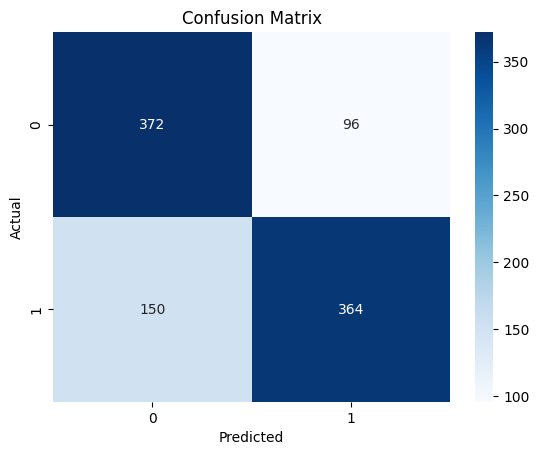

In [7]:

# Vectorizing the cleaned text
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf.fit_transform(df['claude_x_cleaned'].fillna(''))

X = np.hstack((X_tfidf.toarray(), df[['hour_x', 'day_x', 'month_x', 'year_x']].values))
y = df['retweet_count_x_more_y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Feature Importance Analysis

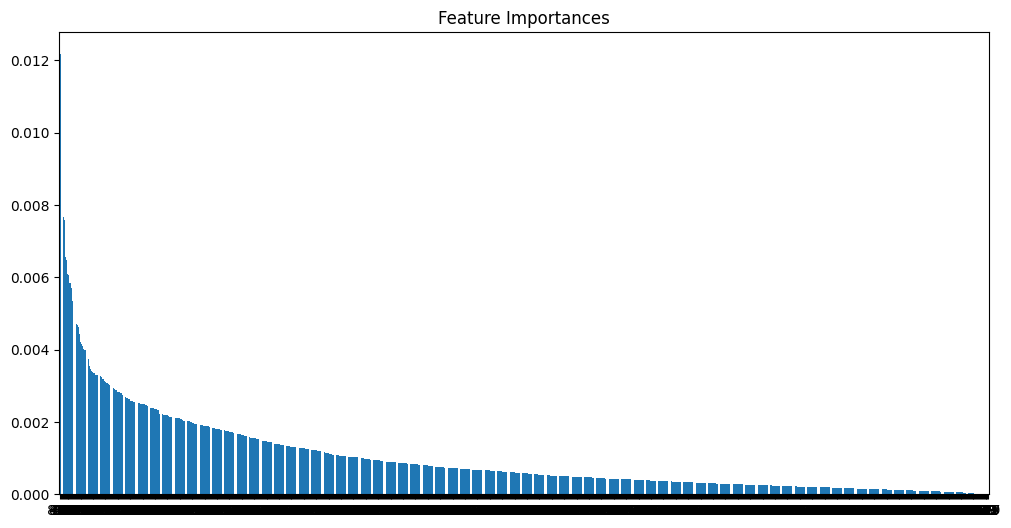

In [11]:

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


## Summary
In this notebook, various analyses are performed using the Crowd Reaction Estimation Dataset (CRED). The dataset consists of pairs of tweets from The White House with comparative measures of retweet counts. Our analyses included:

1. **Exploratory Data Analysis:** Visualized the distribution of retweet counts for both tweets.
2. **Time-based Analysis:** Examined the relationship between the time of posting and retweet counts.
3. **Category-wise Analysis:** Analyzed retweet counts across different tweet categories.
4. **Sentiment Analysis:** Performed sentiment analysis on model responses (Claude, ChatGPT, Flan-ul2) and visualized the sentiment distributions.
5. **Prediction Modeling:** Built a predictive model to estimate which tweet will receive more retweets using features such as timestamp and model responses.
6. **Feature Importance Analysis:** Identified the most important features influencing the prediction of higher retweet counts.

These analyses provided insights into tweet engagement and factors affecting retweet counts.

## Conclusion
These analyses revealed several interesting patterns and insights about tweet engagement:

- The distribution of retweet counts showed variability, indicating differences in tweet popularity.
- Time-based analysis suggested that the hour of the day might influence retweet counts.
- Category-wise analysis highlighted differences in engagement across various tweet categories.
- Sentiment analysis of model responses showed varying sentiment scores, which can impact tweet engagement.
- The predictive modeling approach demonstrated the potential to estimate tweet success using available features.

These findings can help digital marketers and content writers better understand and predict social media post reach, leading to more effective content strategies.
